<a href="https://colab.research.google.com/github/FaCu97/7506R-1C2023-GRUPO11/blob/main/tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRABAJO PRÁCTICO N°1: RESERVAS DE HOTEL
### 1. Análisis Exploratorio y Preprocesamiento de Datos

El primer paso consiste en la selección de los datos que se van a utilizar

In [374]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [375]:
ds_hotels = pd.read_csv("https://github.com/FaCu97/7506R-1C2023-GRUPO11/raw/main/Datasets/hotels_train.csv")

In [376]:
ds_hotels_train=ds_hotels.copy()

ds_hotels_original = ds_hotels.copy()

In [377]:
ds_hotels_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,9.0,NaN,0,Transient,115.5,0,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,NaN,0,Transient,42.0,1,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,9.0,NaN,0,Transient,229.0,0,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,154.0,NaN,0,Transient,75.0,0,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,20.0,NaN,0,Transient-Party,75.0,0,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0


In [378]:
ds_hotels_train.shape

(61913, 32)

Vemos los valores nulos en las columnas 

In [379]:
ds_hotels_train.isnull().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


In [380]:
ds_hotels['company']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
61908      NaN
61909      NaN
61910    153.0
61911      NaN
61912      NaN
Name: company, Length: 61913, dtype: float64

Se puede observar que la varible 'company' con 58761 valores NaN, no aporta información para el análisis.

ELIMINO LAS COLUMNAS QUE NO INTERESAN

In [381]:
columns_drop = ['company']
ds_hotels_train.drop(columns=columns_drop, inplace=True)
ds_hotels_train.reset_index(drop=True, inplace=True)


In [382]:
ds_hotels_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list              

In [383]:
ds_hotels_train['agent']

0          9.0
1          NaN
2          9.0
3        154.0
4         20.0
         ...  
61908    240.0
61909      NaN
61910      NaN
61911     96.0
61912      9.0
Name: agent, Length: 61913, dtype: float64

## **Analisis Exploratorio**

VARIABLES CUALITATIVAS: lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests

VARIABLES CUANTITATIVAS: hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type.

HOTEL: varible cuantivativa, hotel al que arriba el usurio

<Axes: title={'center': 'Valores frecuentes variable hotel'}, xlabel='hotel', ylabel='Frecuancia'>

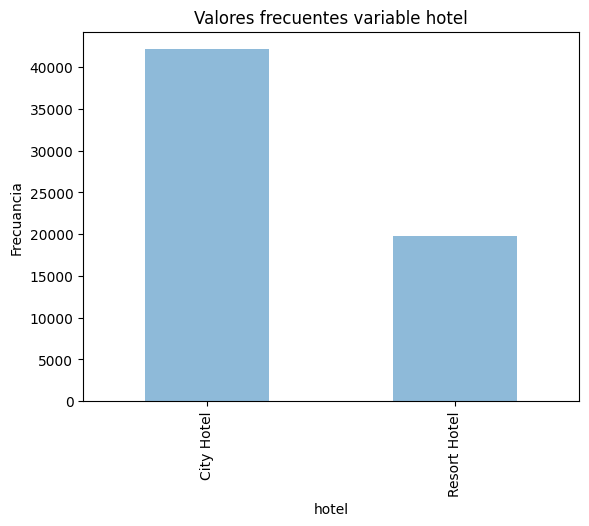

In [384]:
ds_hotels_train['hotel'].value_counts().plot.bar(alpha=0.5, title='Valores frecuentes variable hotel', xlabel='hotel', ylabel='Frecuancia')

ARRIVAL DATE MONTH: varible cuantivativa, mes donde hay mas reservas

<Axes: title={'center': 'Variable arrival date month'}, xlabel='mes', ylabel='Frecuencia'>

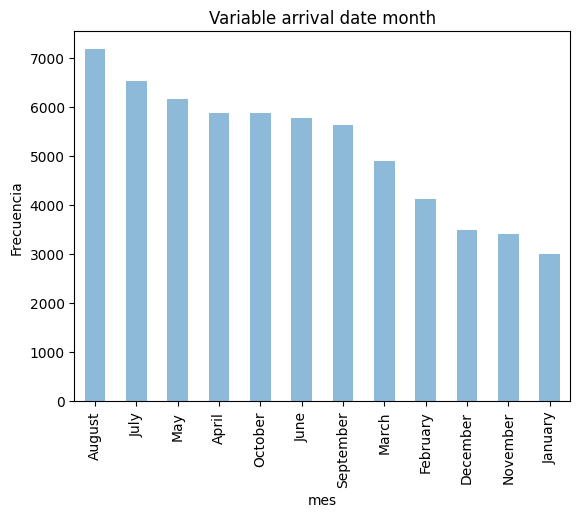

In [385]:
ds_hotels_train['arrival_date_month'].value_counts().plot.bar(alpha=0.5, title='Variable arrival date month', xlabel='mes', ylabel='Frecuencia')

MEAL: varible cuanlitativa, comidas del hotel

<Axes: title={'center': 'Variable meal'}, xlabel='meal', ylabel='Frecuencia'>

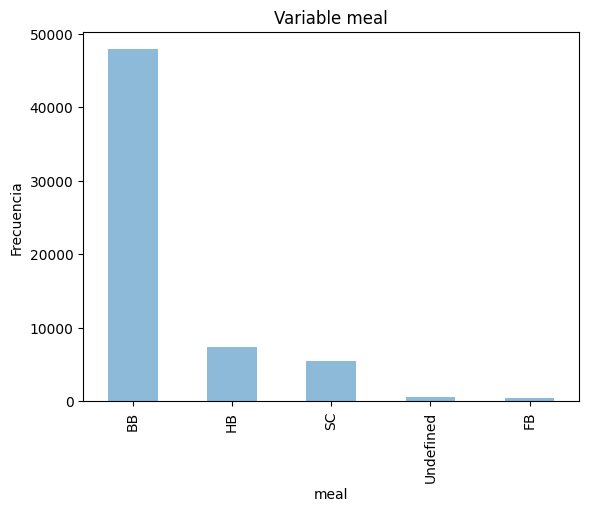

In [386]:
ds_hotels_train['meal'].value_counts().plot.bar(alpha=0.5, title='Variable meal', xlabel='meal', ylabel='Frecuencia')

COUNTRY: variable cualiataiva, país del que pide reservación

In [387]:
ds_hotels_train['country']

0        USA
1        PRT
2        CHE
3        PRT
4        FRA
        ... 
61908    ESP
61909    FRA
61910    FRA
61911    PRT
61912    ISR
Name: country, Length: 61913, dtype: object

In [388]:
ds_hotels_train.groupby('country').agg(frequency=('country', 'count'))

,frequency
country,
AGO,200
ALB,7
AND,5
ARE,33
ARG,106
...,...
VGB,1
VNM,2
ZAF,57


MARKET SEGMENT: varible cualitativa

<Axes: title={'center': 'Variable market_segment'}, xlabel='market_segment', ylabel='Frecuencia'>

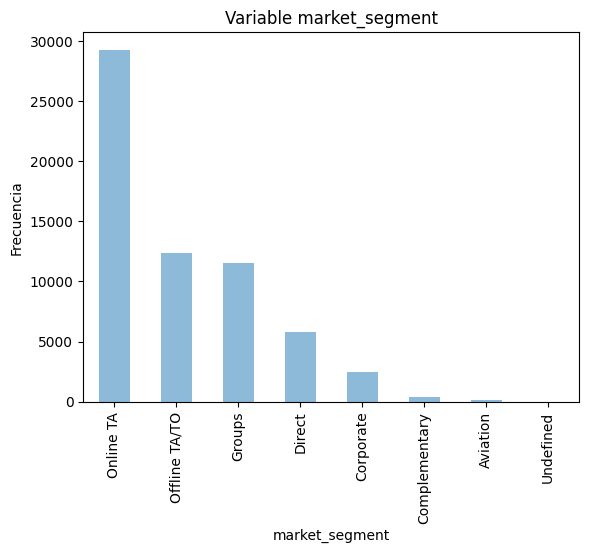

In [389]:
ds_hotels_train['market_segment'].value_counts().plot.bar(alpha=0.5, title='Variable market_segment', xlabel='market_segment', ylabel='Frecuencia')

DISTRIBUTION CHANNEL: varible cualitativa

<Axes: title={'center': 'Variable distribution_channel'}, xlabel='distribution_channel', ylabel='Frecuencia'>

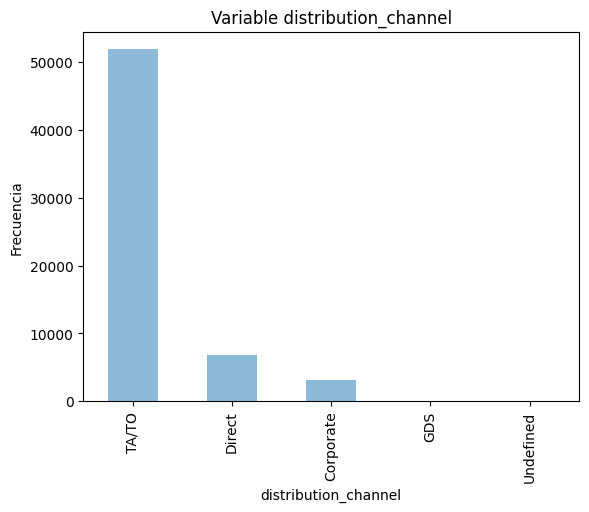

In [390]:
ds_hotels_train['distribution_channel'].value_counts().plot.bar(alpha=0.5, title='Variable distribution_channel', xlabel='distribution_channel', ylabel='Frecuencia')

RESERVED_ROOM_TYPE: variable cualitativa, tipo de habitación reservado

<Axes: title={'center': 'Variable reserved_room_type'}, xlabel='reserved_room_type', ylabel='Frecuencia'>

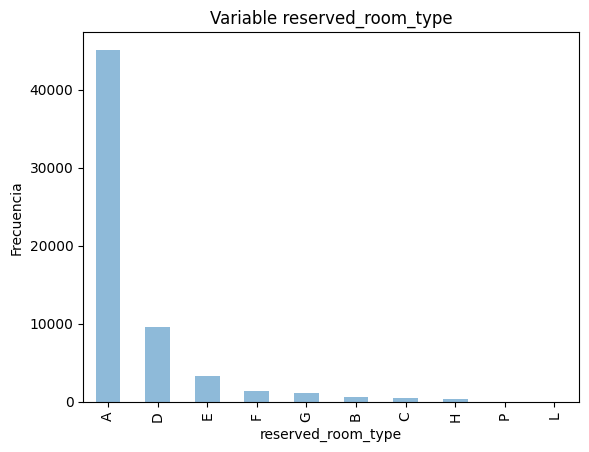

In [391]:
ds_hotels_train['reserved_room_type'].value_counts().plot.bar(alpha=0.5, title='Variable reserved_room_type', xlabel='reserved_room_type', ylabel='Frecuencia')

ASSIGNED_ROOM_TYPE: varible cualitativa, habitación asignada

<Axes: title={'center': 'Variable assigned_room_type'}, xlabel='assigned_room_type', ylabel='Frecuencia'>

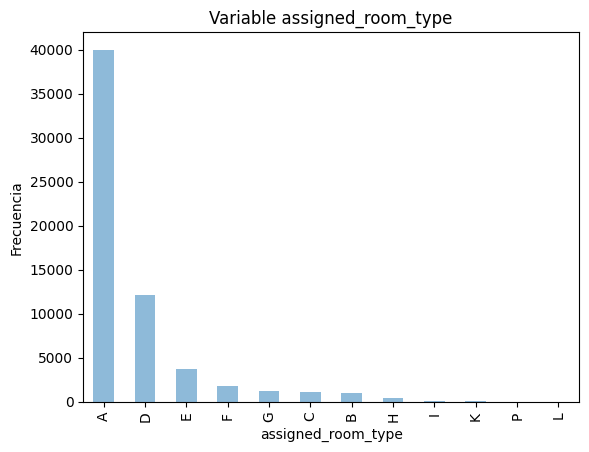

In [392]:
ds_hotels_train['assigned_room_type'].value_counts().plot.bar(alpha=0.5, title='Variable assigned_room_type', xlabel='assigned_room_type', ylabel='Frecuencia')

DEPOSIT_TYPE: varible cualitiva, tipo de deposito

<Axes: title={'center': 'Variable deposit_type'}, xlabel='deposit_type', ylabel='Frecuencia'>

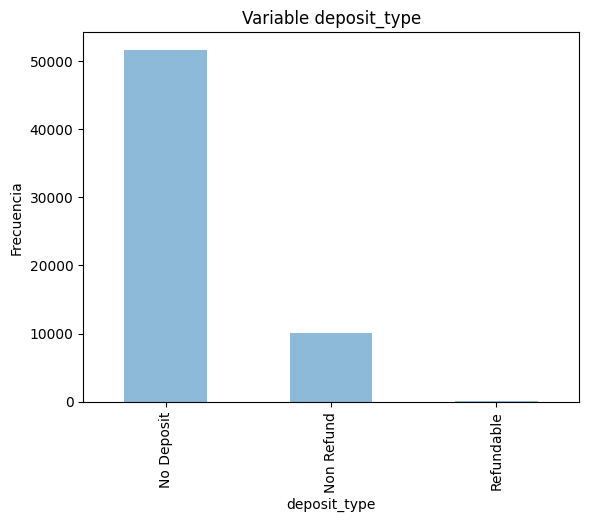

In [393]:
ds_hotels_train['deposit_type'].value_counts().plot.bar(alpha=0.5, title='Variable deposit_type', xlabel='deposit_type', ylabel='Frecuencia')

CUSTOMER TYPE: varible cualitativa, tipo de consumidor 

<Axes: title={'center': 'Variable customer_type'}, xlabel='customer_type', ylabel='Frecuencia'>

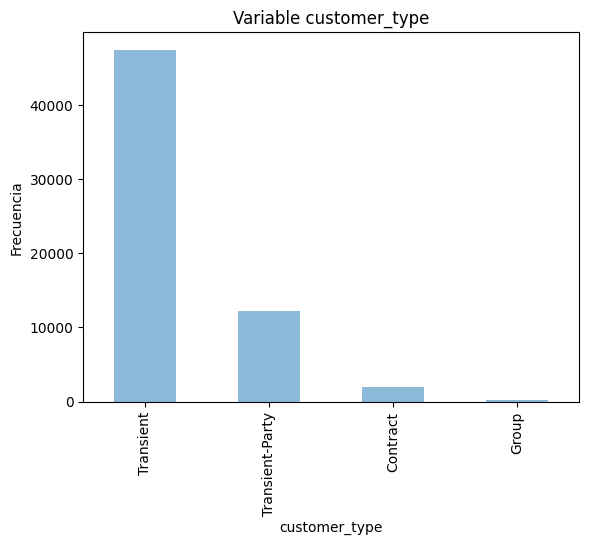

In [394]:
ds_hotels_train['customer_type'].value_counts().plot.bar(alpha=0.5, title='Variable customer_type', xlabel='customer_type', ylabel='Frecuencia')

VARIABLE CUANTITATIVAS lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests

LEAD TIME: tiempo que trasncurre entre que la reservación hasta la llegada del cliente

In [395]:
print('LEAD TIME')
print('Media :',ds_hotels_train['lead_time'].mean())
print('Mediana:',ds_hotels_train['lead_time'].median())
print('Moda :',ds_hotels_train['lead_time'].mode())

LEAD TIME
Media : 112.24818697204141
Mediana: 78.0
Moda : 0    0
Name: lead_time, dtype: int64


ARRIVAL DATE YEAR: Año de arribo al hotel

In [396]:
print('ARRIVAL DATE YEAR')
print('Media :',ds_hotels_train['arrival_date_year'].mean())
print('Mediana:',ds_hotels_train['arrival_date_year'].median())
print('Moda :',ds_hotels_train['arrival_date_year'].mode())


ARRIVAL DATE YEAR
Media : 2016.1547494064253
Mediana: 2016.0
Moda : 0    2016
Name: arrival_date_year, dtype: int64


ARRIVAL DATE WEEK NUMBER : número de semana que arrivo

In [397]:
print('ARRIVAL DATE WEEK NUMBER')
print('Media :',ds_hotels_train['arrival_date_week_number'].mean())
print('Mediana:',ds_hotels_train['arrival_date_week_number'].median())
print('Moda :',ds_hotels_train['arrival_date_week_number'].mode())

ARRIVAL DATE WEEK NUMBER
Media : 27.21808020932599
Mediana: 28.0
Moda : 0    33
Name: arrival_date_week_number, dtype: int64


ARRIVAL DATE OF MONTH : numero del mes que arrivo

In [398]:
print('ARRIVAL DATE OF MONTH')
print('Media :',ds_hotels_train['arrival_date_day_of_month'].mean())
print('Mediana:',ds_hotels_train['arrival_date_day_of_month'].median())
print('Moda :',ds_hotels_train['arrival_date_day_of_month'].mode())

ARRIVAL DATE OF MONTH
Media : 15.785812349587324
Mediana: 16.0
Moda : 0    17
Name: arrival_date_day_of_month, dtype: int64


STAYS IN WEEKEND NIGHTS: cantidad de veces que se queda en las noches los fines de semana

In [399]:
print('STAYS IN WEEKEND NIGHTS')
print('Media :',ds_hotels_train['stays_in_weekend_nights'].mean())
print('Mediana:',ds_hotels_train['stays_in_weekend_nights'].median())
print('Moda :',ds_hotels_train['stays_in_weekend_nights'].mode())

STAYS IN WEEKEND NIGHTS
Media : 0.9241354804322194
Mediana: 1.0
Moda : 0    0
Name: stays_in_weekend_nights, dtype: int64


STAYS IN WEEK NIGHTS: cantidad de veces que se queda en las noches en la semana             stays_in_week_nights

In [400]:
print('STAYS IN WEEK NIGHTS')
print('Media :',ds_hotels_train['stays_in_week_nights'].mean())
print('Mediana:',ds_hotels_train['stays_in_week_nights'].median())
print('Moda :',ds_hotels_train['stays_in_week_nights'].mode())

STAYS IN WEEK NIGHTS
Media : 2.5100544312179993
Mediana: 2.0
Moda : 0    2
Name: stays_in_week_nights, dtype: int64


ADULT: cantidad de adultos

In [401]:
print('ADULTS')
print('Media :',ds_hotels_train['adults'].mean())
print('Mediana:',ds_hotels_train['adults'].median())
print('Moda :',ds_hotels_train['adults'].mode())

ADULTS
Media : 1.862791336229871
Mediana: 2.0
Moda : 0    2
Name: adults, dtype: int64


CHILDREN:
 

In [402]:
print('CHILDREN')
print('Media :',ds_hotels_train['children'].mean())
print('Mediana:',ds_hotels_train['children'].median())
print('Moda :',ds_hotels_train['children'].mode())

CHILDREN
Media : 0.10489589558868662
Mediana: 0.0
Moda : 0    0.0
Name: children, dtype: float64


BABIES: 

In [403]:
print('BABIES')
print('Media :',ds_hotels_train['babies'].mean())
print('Mediana:',ds_hotels_train['babies'].median())
print('Moda :',ds_hotels_train['babies'].mode())

BABIES
Media : 0.007155201653933746
Mediana: 0.0
Moda : 0    0
Name: babies, dtype: int64


IS REPEATED GUEST

In [404]:
print('IS REPEATED GUEST')
print('Media :',ds_hotels_train['is_repeated_guest'].mean())
print('Mediana:',ds_hotels_train['is_repeated_guest'].median())
print('Moda :',ds_hotels_train['is_repeated_guest'].mode())

IS REPEATED GUEST
Media : 0.027990890443041042
Mediana: 0.0
Moda : 0    0
Name: is_repeated_guest, dtype: int64


PREVIOUS CANCELLATIONS 



In [405]:
print('PREVIOUS CANCELLATIONS')
print('Media :',ds_hotels_train['previous_cancellations'].mean())
print('Mediana:',ds_hotels_train['previous_cancellations'].median())
print('Moda :',ds_hotels_train['previous_cancellations'].mode())

PREVIOUS CANCELLATIONS
Media : 0.11479010870091903
Mediana: 0.0
Moda : 0    0
Name: previous_cancellations, dtype: int64


PREVIOUS BOOKINGS


In [406]:
print('PREVIOUS BOOKINGS NOT CANCELED')
print('Media :',ds_hotels_train['previous_bookings_not_canceled'].mean())
print('Mediana:',ds_hotels_train['previous_bookings_not_canceled'].median())
print('Moda :',ds_hotels_train['previous_bookings_not_canceled'].mode())

PREVIOUS BOOKINGS NOT CANCELED
Media : 0.11542002487361297
Mediana: 0.0
Moda : 0    0
Name: previous_bookings_not_canceled, dtype: int64


BOOKING_CHANGES: 

In [407]:
print('BOOKING CHANGES')
print('Media :',ds_hotels_train['booking_changes'].mean())
print('Mediana:',ds_hotels_train['booking_changes'].median())
print('Moda :',ds_hotels_train['booking_changes'].mode())

BOOKING CHANGES
Media : 0.19595238479802304
Mediana: 0.0
Moda : 0    0
Name: booking_changes, dtype: int64


AGENT: 

In [408]:
print('AGENT')
print('Media :',ds_hotels_train['agent'].mean())
print('Mediana:',ds_hotels_train['agent'].median())
print('Moda :',ds_hotels_train['agent'].mode())

AGENT
Media : 84.54101031042333
Mediana: 12.0
Moda : 0    9.0
Name: agent, dtype: float64


COMPANY


In [409]:
print('COMPANY')
"""print('Media :',ds_hotels_train['company'].mean())
print('Mediana:',ds_hotels_train['company'].median())
print('Moda :',ds_hotels_train['company'].mode())
"""

COMPANY


"print('Media :',ds_hotels_train['company'].mean())\nprint('Mediana:',ds_hotels_train['company'].median())\nprint('Moda :',ds_hotels_train['company'].mode())\n"

DAYS IN WAINTING LIST: days_in_waiting_list

In [410]:
print('DAYS IN WAINTING LIST')
print('Media :',ds_hotels_train['days_in_waiting_list'].mean())
print('Mediana:',ds_hotels_train['days_in_waiting_list'].median())
print('Moda :',ds_hotels_train['days_in_waiting_list'].mode())

DAYS IN WAINTING LIST
Media : 2.6389772745626927
Mediana: 0.0
Moda : 0    0
Name: days_in_waiting_list, dtype: int64


ADR: adr, required_car_parking_spaces, total_of_special_requests

In [411]:
print('ADR')
print('Media :',ds_hotels_train['adr'].mean())
print('Mediana:',ds_hotels_train['adr'].median())
print('Moda :',ds_hotels_train['adr'].mode())

ADR
Media : 102.38377303635745
Mediana: 95.0
Moda : 0    62.0
Name: adr, dtype: float64


REQUIRED CAR PARKING SPACES:

In [412]:
print('REQUIRED CAR PARKING SPACES')
print('Media :',ds_hotels_train['required_car_parking_spaces'].mean())
print('Mediana:',ds_hotels_train['required_car_parking_spaces'].median())
print('Moda :',ds_hotels_train['required_car_parking_spaces'].mode())

REQUIRED CAR PARKING SPACES
Media : 0.04995719800365028
Mediana: 0.0
Moda : 0    0
Name: required_car_parking_spaces, dtype: int64


TOTAL OF SPECIAL REQUESTS: 

In [413]:
print('REQUIRED CAR PARKING SPACES')
print('Media :',ds_hotels_train['total_of_special_requests'].mean())
print('Mediana:',ds_hotels_train['total_of_special_requests'].median())
print('Moda :',ds_hotels_train['total_of_special_requests'].mode())

REQUIRED CAR PARKING SPACES
Media : 0.5237026149597015
Mediana: 0.0
Moda : 0    0
Name: total_of_special_requests, dtype: int64


CORRELACION ENTE VARIABLES
            data['A'].corr(data['B'])



In [414]:
ds_hotels_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list              

# ANALISIS DE DATOS FALTANTES

dataset original: ds_hotels_original

dataset modificado: ds_hotels_modificado

In [415]:
ds_hotels_modificado = ds_hotels_original.copy()

**Datos Indefinidos**



In [416]:
tienen_caracter_raro = ds_hotels_original.astype('str').eq('Undefined').any()
tienen_caracter_raro.to_frame('Posee datos indefinidos?')

,Posee datos indefinidos?
hotel,False
lead_time,False
arrival_date_year,False
arrival_date_month,False
arrival_date_week_number,False
arrival_date_day_of_month,False
stays_in_weekend_nights,False
stays_in_week_nights,False
adults,False
children,False


Se observa que las categorías "meal", "market_segment" y "distribution_channel" tienen valores Undefined.

Dichos datos representan los siguientes porcentajes en sus categorías:


In [417]:
columnas = ['meal','market_segment','distribution_channel']
tienen_caracter_raro = ds_hotels_original[columnas].astype('str').eq('Undefined').sum() * 100 / len(ds_hotels_original.index)
tienen_caracter_raro.round(3).to_frame('Porcentaje nulos')

,Porcentaje nulos
meal,0.955
market_segment,0.003
distribution_channel,0.006


**DATOS NULOS**

In [418]:
tienen_datos_nulos = ds_hotels_original.isnull().any()
tienen_datos_nulos.to_frame('Posee datos nulos?')

,Posee datos nulos?
hotel,False
lead_time,False
arrival_date_year,False
arrival_date_month,False
arrival_date_week_number,False
arrival_date_day_of_month,False
stays_in_weekend_nights,False
stays_in_week_nights,False
adults,False
children,True


Las categorias "children", "country", "agent" y "company" poseen valores nulos.

Dichos datos representan los siguientes porcentajes en sus categorías:

In [419]:
columnas = ['children','country', 'agent', 'company']
tienen_datos_nulos = ds_hotels_original[columnas].isnull().sum() * 100 / len(ds_hotels_original.index)
tienen_datos_nulos.round(3).to_frame('Porcentaje nulos')

,Porcentaje nulos
children,0.006
country,0.357
agent,12.744
company,94.909




---


**IMPUTACION DE DATOS INDEFINIDOS**

**Distribution channel:** Esta variable es categórica y toma los siguientes valores:


In [420]:
ds_hotels_modificado['distribution_channel'].unique()

array(['TA/TO', 'Direct', 'Corporate', 'GDS', 'Undefined'], dtype=object)

En cierto punto está relacionada con las variables 'agent' y 'company'. Sin embago al no ser tan clara la relación y ser pocos los registros indefinidos, se decide eliminar dichos valores.

In [421]:
ds_hotels_modificado = ds_hotels_modificado.drop(ds_hotels_modificado[ds_hotels_modificado['distribution_channel'].astype('str').eq('Undefined')].index)

columnas = ['meal','market_segment','distribution_channel']
tienen_caracter_raro = ds_hotels_modificado[columnas].astype('str').eq('Undefined').sum() * 100 / len(ds_hotels_modificado.index)
tienen_caracter_raro.round(3).to_frame('Porcentaje nulos')

,Porcentaje nulos
meal,0.955
market_segment,0.000
distribution_channel,0.000


**Market segment:** Los valores indefinidos de esta variable estaban incluidos en los de 'distribution_channel'. El análisis es análogo y se decide que permanezcan fuera del dataset.

**Meal:** Esta variable es categórica y toma los siguientes valores:

In [422]:
ds_hotels_modificado['meal'].unique()

array(['BB', 'HB', 'SC', 'Undefined', 'FB'], dtype=object)

En este caso, los valores 'SC' u 'Undefined' representan lo mismo, una reserva sin paquete de comida.
Se decide unificarlas en la de mayor cantidad de valores, que es SC:

In [423]:
columnas = ['meal']
tienen_caracter_raro = ds_hotels_modificado[columnas].astype('str').eq('SC').sum()
tienen_caracter_raro.round(3).to_frame('Cantidad SC')

,Cantidad SC
meal,5556


In [424]:
columnas = ['meal']
tienen_caracter_raro = ds_hotels_modificado[columnas].astype('str').eq('Undefined').sum()
tienen_caracter_raro.round(3).to_frame('Cantidad Undefined')

,Cantidad Undefined
meal,591


In [425]:
ds_hotels_modificado.loc[ds_hotels_modificado['meal'].astype('str').eq('Undefined'), 'meal'] = 'SC'

Chequeo que estén resueltos los datos indefinidos:

In [426]:
columnas = ['meal','market_segment','distribution_channel']
tienen_caracter_raro = ds_hotels_modificado[columnas].astype('str').eq('Undefined').sum() * 100 / len(ds_hotels_modificado.index)
tienen_caracter_raro.round(3).to_frame('Porcentaje nulos')

,Porcentaje nulos
meal,0.0
market_segment,0.0
distribution_channel,0.0




---
**IMPUTACION DE DATOS NULOS**


Vuelvo a revisarlos:

In [427]:
columnas = ['children','country', 'agent', 'company']
tienen_datos_nulos = ds_hotels_modificado[columnas].isnull().sum()
tienen_datos_nulos.round(3).to_frame('Registros nulos')

,Registros nulos
children,0
country,221
agent,7888
company,58757


**Children**: Dichos registros coincidieron con los que fueron eliminados anteriormente. El porcentaje faltante era despreciable, por lo que se confirma esa decisión.

**Country:** Esta variable es categórica. Faltan 221 datos, se pueden considerar como "no informados" un una nueva categoría 'NOC'

In [428]:
ds_hotels_modificado.loc[ds_hotels_modificado['country'].isnull(), 'country'] = 'NOC'

**Agent:** Falta una cantidad significativa que representa cerca del 13%.

In [429]:
columnas = ['agent']
tienen_datos_nulos = ds_hotels_modificado[columnas].isnull().sum()* 100 / len(ds_hotels_modificado.index)
tienen_datos_nulos.round(3).to_frame('Porcentaje nulos')

,Porcentaje nulos
agent,12.741


In [430]:
ds_hotels_modificado['agent'].unique()

array([  9.,  nan, 154.,  20., 314., 240.,  58., 250.,  86., 229.,   1.,
        33.,   8.,   3., 236., 177.,  38.,  39., 170., 410.,  85.,  26.,
        96.,  14., 134.,  56., 234., 468., 254., 147.,  34., 138.,  40.,
        29., 315.,  37., 195., 326.,  35., 208.,  22.,  17., 296.,  28.,
         6.,  19.,  98.,  83., 298.,  27., 378., 484.,   7.,  16.,  21.,
       175., 171., 243.,  41.,  45.,  11., 157., 273.,  12., 387., 368.,
       434.,   5.,  36., 436., 405., 191., 257.,  95.,  15.,  31., 440.,
        50., 241.,   4.,  67.,  63., 168.,  44., 261., 281.,  94., 336.,
        30., 420., 104., 121., 464., 196., 142., 151., 242., 119., 339.,
       310., 531., 305.,   2.,  53.,  64., 248., 313., 364., 286., 459.,
       133., 132., 245., 143.,  52., 155., 251., 223., 156., 159., 185.,
       323.,  13., 330., 359., 527., 103.,  68., 174.,  82.,  42., 256.,
       483., 146.,  89., 252., 220.,  88., 303., 181., 152.,  24., 394.,
        75., 306., 183.,  69.,  10., 184., 149., 16

En este caso se decide completar estos valores nulos con 'Undefined'

In [431]:
ds_hotels_modificado.loc[ds_hotels_modificado['agent'].isnull(), 'agent'] = 'Undefined'

**Company:** Falta cerca del 95% de los valores, la mayoría del dataset. Considero que dado la falta de datos, esta columna se puede eliminar.

In [432]:
ds_hotels_modificado = ds_hotels_modificado.drop('company', axis=1)

---

Chequeo las variables numéricas






In [433]:
columnas_con_numeros = ['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','adults', 'children', 'babies', 'is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','is_canceled']
ds_hotels_modificado[columnas_con_numeros].head()
(ds_hotels_modificado[columnas_con_numeros] < 0).any().to_frame('Menor que 0 ?')

,Menor que 0 ?
lead_time,False
arrival_date_year,False
arrival_date_week_number,False
arrival_date_day_of_month,False
stays_in_weekend_nights,False
adults,False
children,False
babies,False
is_repeated_guest,False
previous_cancellations,False


Se encontró un valor numérico negativo en el campo "adr", lo visualizamos para ver el contexto

In [434]:
(ds_hotels_modificado[ds_hotels_modificado['adr'] < 0])

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,is_canceled
21124,Resort Hotel,195,2017,March,10,5,4,6,2,0.0,...,No Deposit,273.0,0,Transient-Party,-6.38,0,0,2017-03-15,869f627f-35fb-42b0-8376-12869739d76e,0


Dado que el ADR es la tarifa diaria promedio, no tiene sentido que tome un valor negativo.
No se puede volver a calcular porque se desconoce el monto abonado.

Necesitamos otro método para sustituir el valor.
Aplico un método iterativo.
Ahora el adr fue calculado como 94.74

In [435]:
#inserto NaN
ds_hotels_modificado.at[21124, 'adr'] = np.nan

In [436]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

columnas=['lead_time','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']
df_eliminar_nans_op3=ds_hotels_modificado[columnas].copy()

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=20, verbose=0, random_state=0) #imputation_order='roman'
df_eliminar_nans_op3_completo=imp.fit_transform(df_eliminar_nans_op3)
pd.DataFrame(df_eliminar_nans_op3_completo, columns=columnas).iloc[21124]
#df_eliminar_nans_op3_completo

lead_time                          195.000000
arrival_date_year                 2017.000000
arrival_date_week_number            10.000000
arrival_date_day_of_month            5.000000
stays_in_weekend_nights              4.000000
stays_in_week_nights                 6.000000
adults                               2.000000
children                             0.000000
babies                               0.000000
previous_cancellations               0.000000
previous_bookings_not_canceled       2.000000
booking_changes                      2.000000
days_in_waiting_list                 0.000000
adr                                 94.742003
required_car_parking_spaces          0.000000
total_of_special_requests            0.000000
Name: 21124, dtype: float64